# Decision Trees using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Image

%matplotlib inline

## Load the data set

In [2]:
# We load the data using pandas library. We considered only the following columns among the others
# as they can impact the rating of the Restaurent.

restaurants_data = pd.read_csv('input/zomato.csv', sep=',', usecols=['Country Code','Longitude','Latitude',
                                                              'Cuisines','Average Cost for two', 'Switch to order menu',
                                                              'Has Table booking','Has Online delivery',
                                                              'Is delivering now','Price range',
                                                              'Aggregate rating','Rating text',
                                                              'Votes'], encoding='latin-1')
restaurants_data.head(5)

,Country Code,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,162,121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,Excellent,314
1,162,121.014101,14.553708,Japanese,1200,Yes,No,No,No,3,4.5,Excellent,591
2,162,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.4,Very Good,270
3,162,121.056475,14.585318,"Japanese, Sushi",1500,No,No,No,No,4,4.9,Excellent,365
4,162,121.057508,14.584450,"Japanese, Korean",1500,Yes,No,No,No,4,4.8,Excellent,229


In [3]:
restaurants_data.dtypes

Country Code              int64
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating text              object
Votes                     int64
dtype: object

## Data cleaning and Data preprocessing

In [4]:
# Formatting the columns 
restaurants_data.columns = [c.replace(' ', '_') for c in restaurants_data.columns]

# Formatting Text data
boolean_map = {'Yes': 1, 'No': 0}
restaurants_data.Has_Table_booking = restaurants_data.Has_Table_booking.map(boolean_map)
restaurants_data.Has_Online_delivery = restaurants_data.Has_Online_delivery.map(boolean_map)
restaurants_data.Is_delivering_now = restaurants_data.Is_delivering_now.map(boolean_map)
restaurants_data.Switch_to_order_menu = restaurants_data.Switch_to_order_menu.map(boolean_map)

# Data cleaning 
restaurants_data.columns = restaurants_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Formatting rating_text column data from string to integers
restaurants_data  = restaurants_data[restaurants_data.rating_text.isin(['Excellent', 'Very Good', 'Good', 'Average', 'Poor', 'Not rated'])]
restaurants_data = restaurants_data.replace(['Excellent', 'Very Good', 'Good', 'Average', 'Poor', 'Not rated' ],[5, 4, 3, 2, 1, 0]) 

restaurants_data.head(5)

,country_code,longitude,latitude,cuisines,average_cost_for_two,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_text,votes
0,162,121.027535,14.565443,"French, Japanese, Desserts",1100,1,0,0,0,3,4.8,5,314
1,162,121.014101,14.553708,Japanese,1200,1,0,0,0,3,4.5,5,591
2,162,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,1,0,0,0,4,4.4,4,270
3,162,121.056475,14.585318,"Japanese, Sushi",1500,0,0,0,0,4,4.9,5,365
4,162,121.057508,14.584450,"Japanese, Korean",1500,1,0,0,0,4,4.8,5,229


## Data Enrichment and Fabrication 

/Users/harinibalakrishnan/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


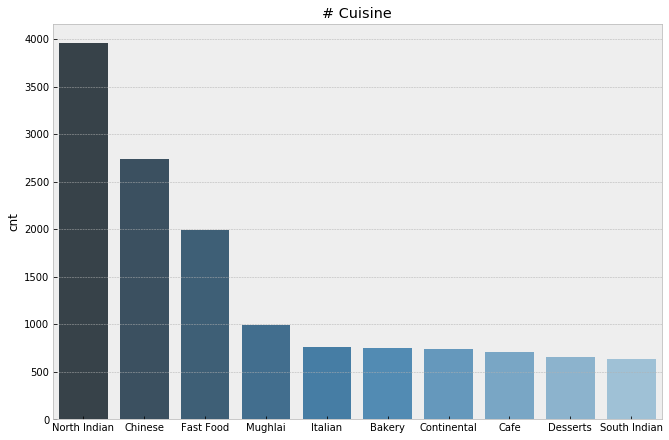

# Unique Cuisine:  146


,0
North Indian,3960
Chinese,2735
Fast Food,1986
Mughlai,995
Italian,764
Bakery,745
Continental,736
Cafe,703
Desserts,653
South Indian,636


In [5]:
import seaborn as sns
from collections import Counter

# Convert the column cuisines from object to string datatype 
restaurants_data['cuisines'] = restaurants_data['cuisines'].astype(str)

# Initialize the list of all cuisines and the count of each cuisine 
lst_cuisine = set()
Cnt_cuisine = Counter()

# Iterate through each row in the data set 
# Take the string from cuisines column and split it as a list
# Now, iterate through this cuisine list 
# Increment the counter based on the occurance of each cuisine in entire dataset
for cu_lst in restaurants_data['cuisines']:
    cu_lst = cu_lst.split(',')
    lst_cuisine.update([cu.strip() for cu in cu_lst])
    for cu in cu_lst:
        Cnt_cuisine[cu.strip()] += 1
        
cnt = pd.DataFrame.from_dict(Cnt_cuisine, orient = 'index')
cnt.sort_values(0, ascending = False, inplace = True)



# Transfer dat from Counter into a DataFrame 
# Consist of Cuisine name and the total occurance count in integer
cuisines_data = pd.DataFrame({"name": [], "count": [] })
for c in cnt.index:
    cuisines_data = cuisines_data.append({"name": str(c), "count": cnt[0][c] }, ignore_index=True)   
                    

# Graphical representaion of the cuicines based on their total occurance count 
tmp_cnt = cnt.head(10)
tmp_cnt.rename(columns = {0:'cnt'}, inplace = True)
with plt.style.context('bmh'):
    f = plt.figure(figsize = (24, 16))
    ax = plt.subplot2grid((2,2), (0,0))
    sns.barplot(x = tmp_cnt.index, y = 'cnt', data = tmp_cnt, ax = ax, palette = sns.color_palette('Blues_d', 10))
    ax.set_title('# Cuisine')
    plt.show()        
print('# Unique Cuisine: ', len(lst_cuisine))

cnt.head(10)

In [6]:
import os
import sys

# Create a new column in the existing dataset 
restaurants_data["cuisine_rate"] = np.random.choice([1,0], restaurants_data.shape[0])

# Iterate through each row in the data set
# Split the cuisines string data into a list
# Inititalize the maximum and the count variable to 0
# Iterate throught the cuisines_data to get the counter rate of a particular cuisine
# Compare the highest counted cuisine for each row
# Save the highest counted cuisine's rate in the new column
for cu_lst in restaurants_data['cuisines']:
    i = restaurants_data.loc[restaurants_data['cuisines'] == cu_lst].index[0]
    cu_lst = cu_lst.split(', ')
    max = 0
    count = 0
    for cu in cu_lst: 
        for c in cuisines_data.index:
            # 147 - 0  = 147 for North Indian (as it is the most popular cuisine)
            if  cu == cuisines_data['name'][c]:
                count = (len(cuisines_data.index) + 1) - c
                if max < count:
                    max = count 
                    restaurants_data["cuisine_rate"][i] = max


# Now that we have cuisine_rate, no need for cuicine's string object for Decision Tree 
restaurants_data.drop("cuisines",  axis=1, inplace=True)

# Save the fabricated data in a seperate csv file 
owd = os.getcwd()
os.chdir(owd)
os.getcwd()
restaurants_data.to_csv('restaurants_data.csv'.format(os.getcwd()))
                
restaurants_data.head(20)

/Users/harinibalakrishnan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,country_code,longitude,latitude,average_cost_for_two,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_text,votes,cuisine_rate
0,162,121.027535,14.565443,1100,1,0,0,0,3,4.8,5,314,139
1,162,121.014101,14.553708,1200,1,0,0,0,3,4.5,5,591,123
2,162,121.056831,14.581404,4000,1,0,0,0,4,4.4,4,270,131
3,162,121.056475,14.585318,1500,0,0,0,0,4,4.9,5,365,123
4,162,121.057508,14.584450,1500,1,0,0,0,4,4.8,5,229,123
5,162,121.056314,14.583764,1000,0,0,0,0,3,4.4,4,336,146
6,162,120.979667,14.531333,2000,1,0,0,0,4,4.0,4,520,131
7,162,120.979333,14.540000,2000,1,0,0,0,4,4.2,4,677,131
8,162,120.980090,14.552990,6000,1,0,0,0,4,4.9,5,621,131
9,162,121.056532,14.572041,1100,1,0,0,0,3,4.8,5,532,71


## Pair Plot 

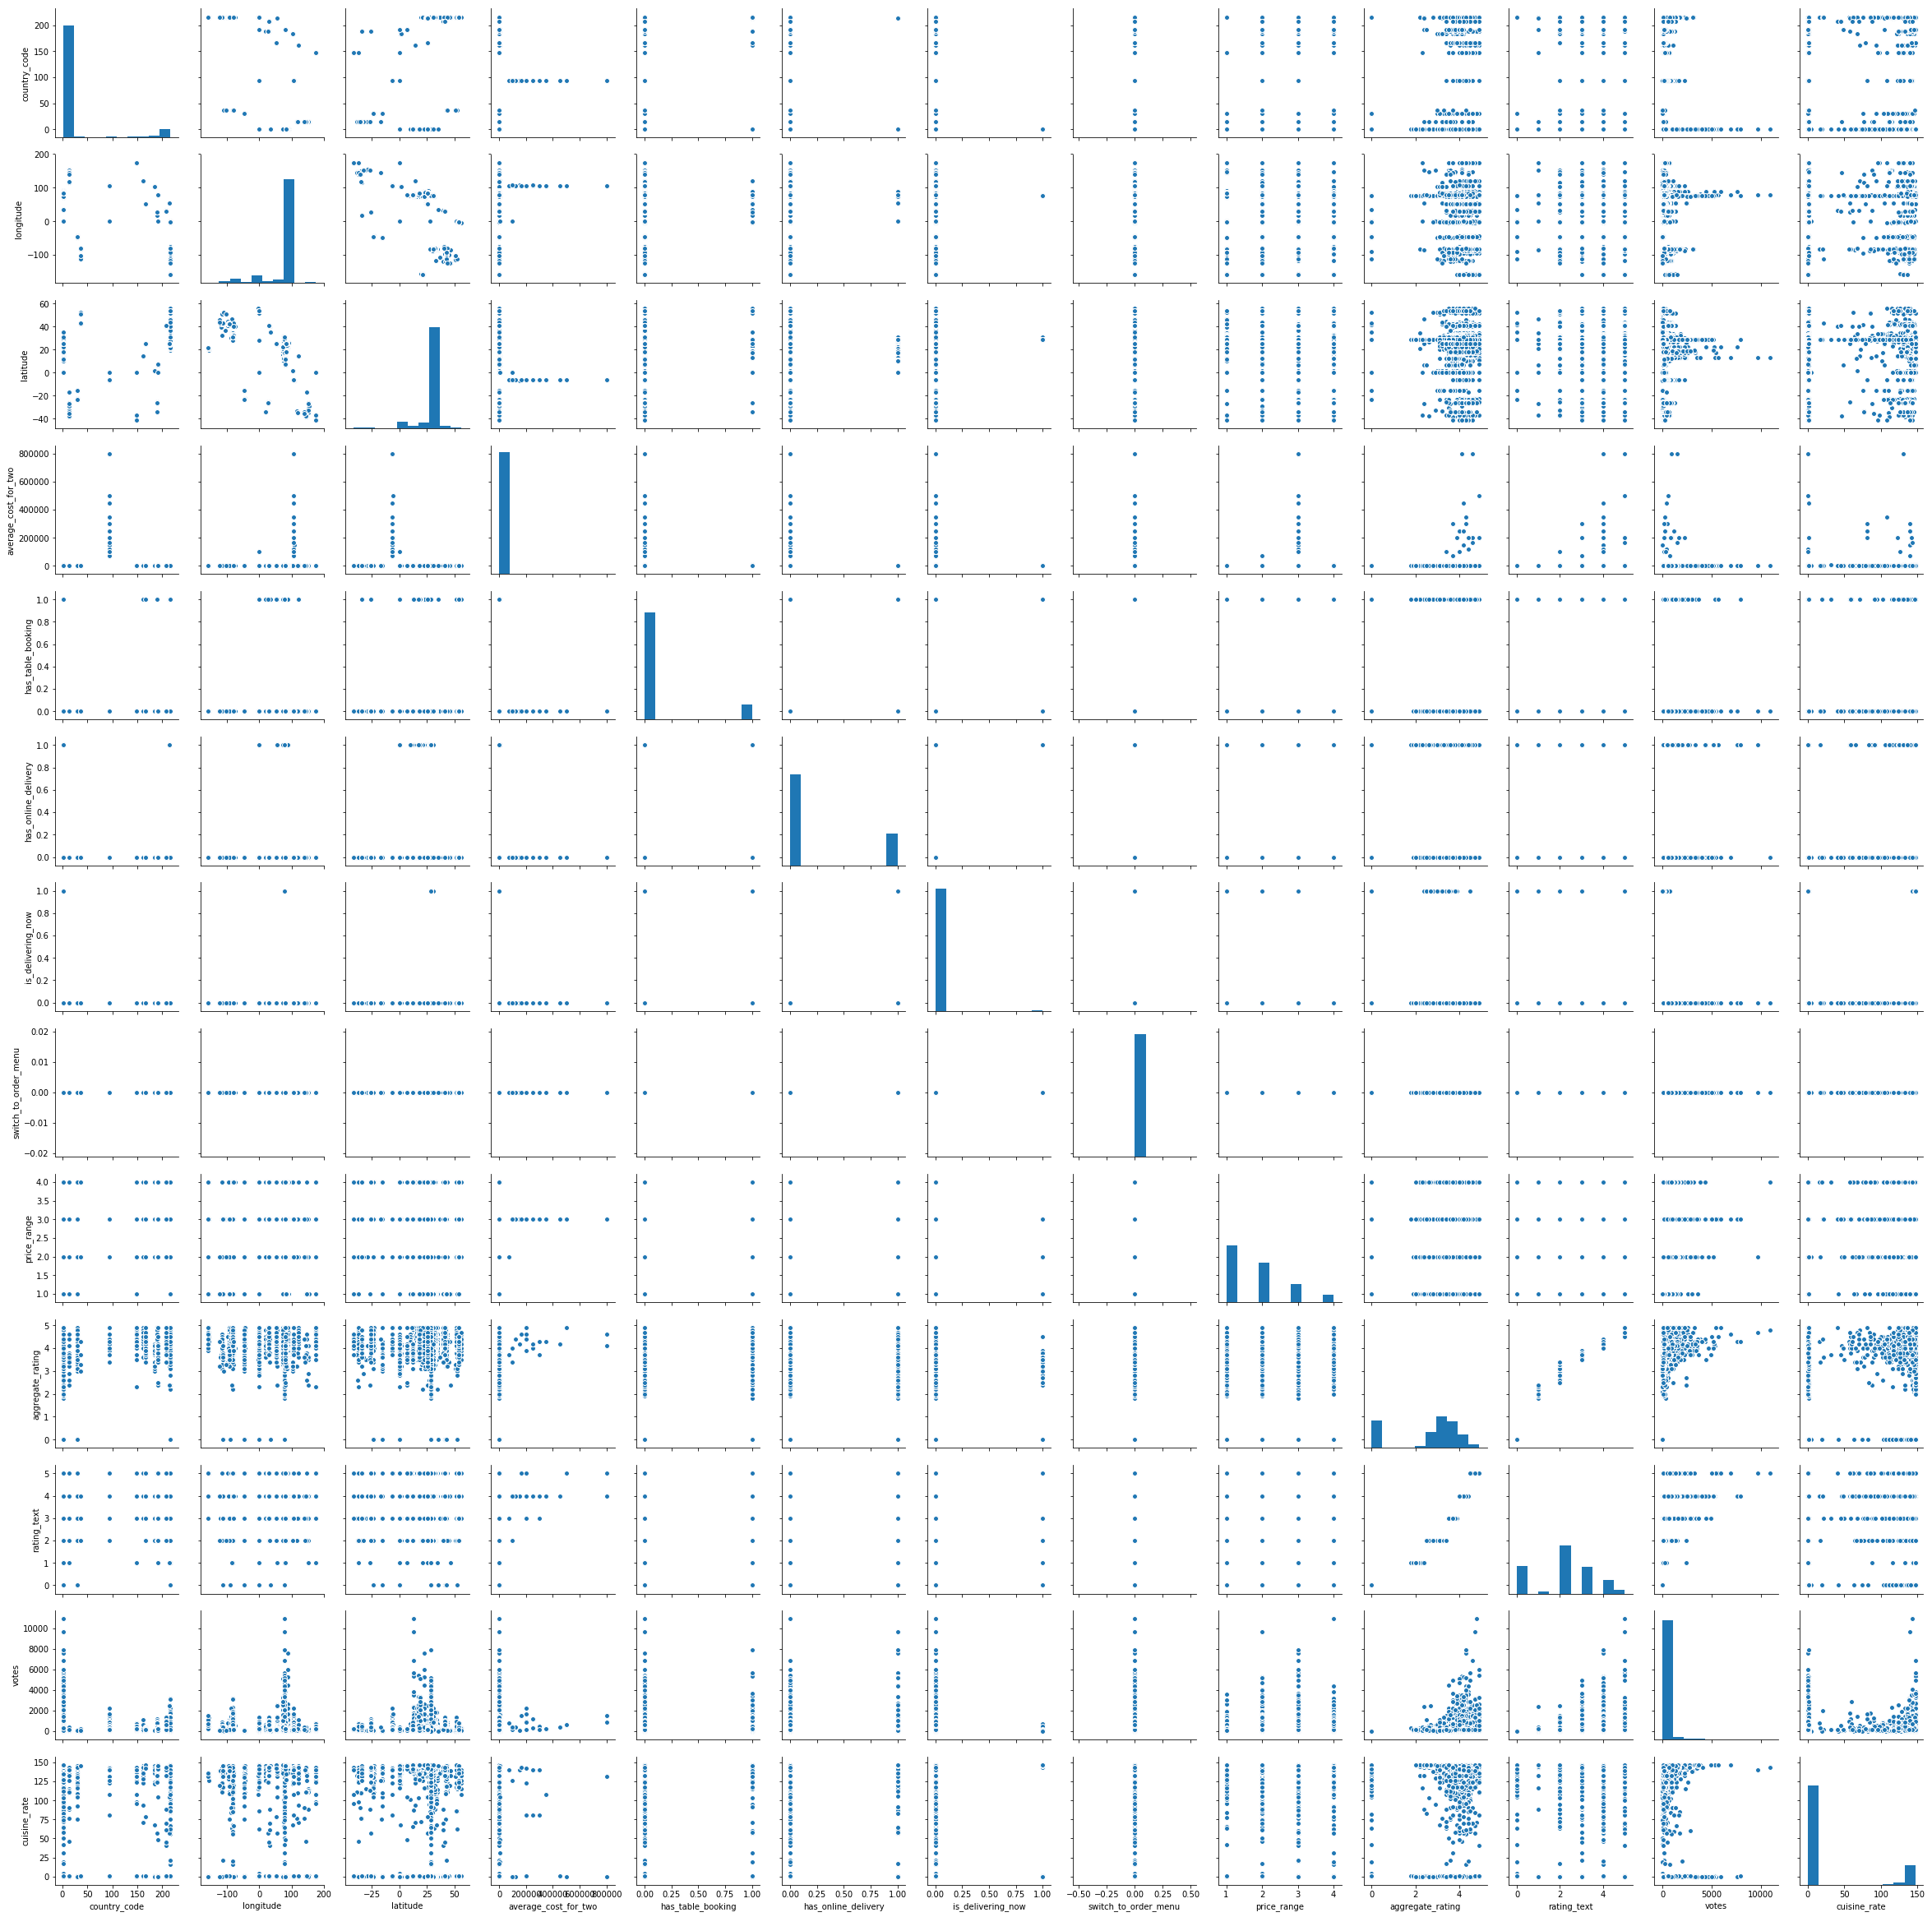

In [7]:
import seaborn as sns #  seaborn package for visualization
# Pairplot to see how data is distrubuted.
g = sns.pairplot(restaurants_data)

In [8]:
restaurants_data.dtypes

country_code              int64
longitude               float64
latitude                float64
average_cost_for_two      int64
has_table_booking         int64
has_online_delivery       int64
is_delivering_now         int64
switch_to_order_menu      int64
price_range               int64
aggregate_rating        float64
rating_text               int64
votes                     int64
cuisine_rate              int64
dtype: object

#### Load the fabricated data set

In [23]:
restaurants_data = pd.read_csv('input/restaurants_data.csv', sep=',', usecols=['country_code','longitude','latitude',
                                                              'average_cost_for_two', 'switch_to_order_menu',
                                                              'has_table_booking','has_online_delivery',
                                                              'is_delivering_now','price_range', 'rating_text',
                                                              'votes', 'cuisine_rate'], encoding='latin-1')
# Formatting rating_text column data 
restaurants_data  = restaurants_data[restaurants_data.rating_text.isin([ 5, 2])]

## Splitting Data into Training and Test Sets

In [24]:
features = restaurants_data.loc[:, restaurants_data.columns != 'rating_text']
target = restaurants_data.loc[:, ['rating_text']]

In [25]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.cross_validation import train_test_split

# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3028, 11)
(3028, 1)
(1010, 11)
(1010, 1)


# Decision Tree Classifier 

In [27]:
# Import the model
from sklearn.tree import DecisionTreeClassifier 

# Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 5)

# Train the model on the data 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
# import the accuracy metrics 
from sklearn.metrics import accuracy_score

# predict the value of restaurant rating 
y_pred = clf.predict(X_test)

# ratio of correctly predicted observation to the total observations
# Accuracy = TP+TN/TP+FP+FN+TN
print(accuracy_score(y_test,y_pred))

0.9821782178217822


### Classification Report and Confusion Matrix

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

          2       0.99      0.99      0.99       940
          5       0.85      0.90      0.88        70

avg / total       0.98      0.98      0.98      1010



In [30]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=[ 'Predicted_Average', 'Predicted_Excellent'],
    index=[ 'True_Average', 'True_Excellent']
)

,Predicted_Average,Predicted_Excellent
True_Average,929,11
True_Excellent,7,63


### Receiver Operating Characteristic (ROC) and Area Under the Circle (AUC) curve

In [31]:
from sklearn.metrics import roc_curve, auc

# ROC curve False prediction, True prediction, threshold 
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=5)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.01170213 1.        ]
[0.  0.9 1. ]
[6 5 2]


In [32]:
# AUC score
roc_auc = auc(fpr,tpr)
roc_auc

0.9441489361702127

Accuracy =  0.9821782178217822


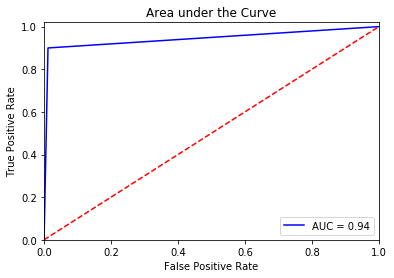

In [33]:
import matplotlib.pyplot as plt

# Graphical representaion of AUC 
print("Accuracy = ", accuracy_score(y_test, y_pred))
plt.title('Area under the Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Visualize Decision Tree 

In [34]:
from sklearn import tree
dot_data = tree.export_graphviz(clf,
                     out_file = "ratingDCTree.dot",
                     feature_names = features.columns.values,
                     filled=True, rounded=True, special_characters=True)

In [35]:
!dot -Tpng ratingDCTree.dot -o ratingDCTree.png

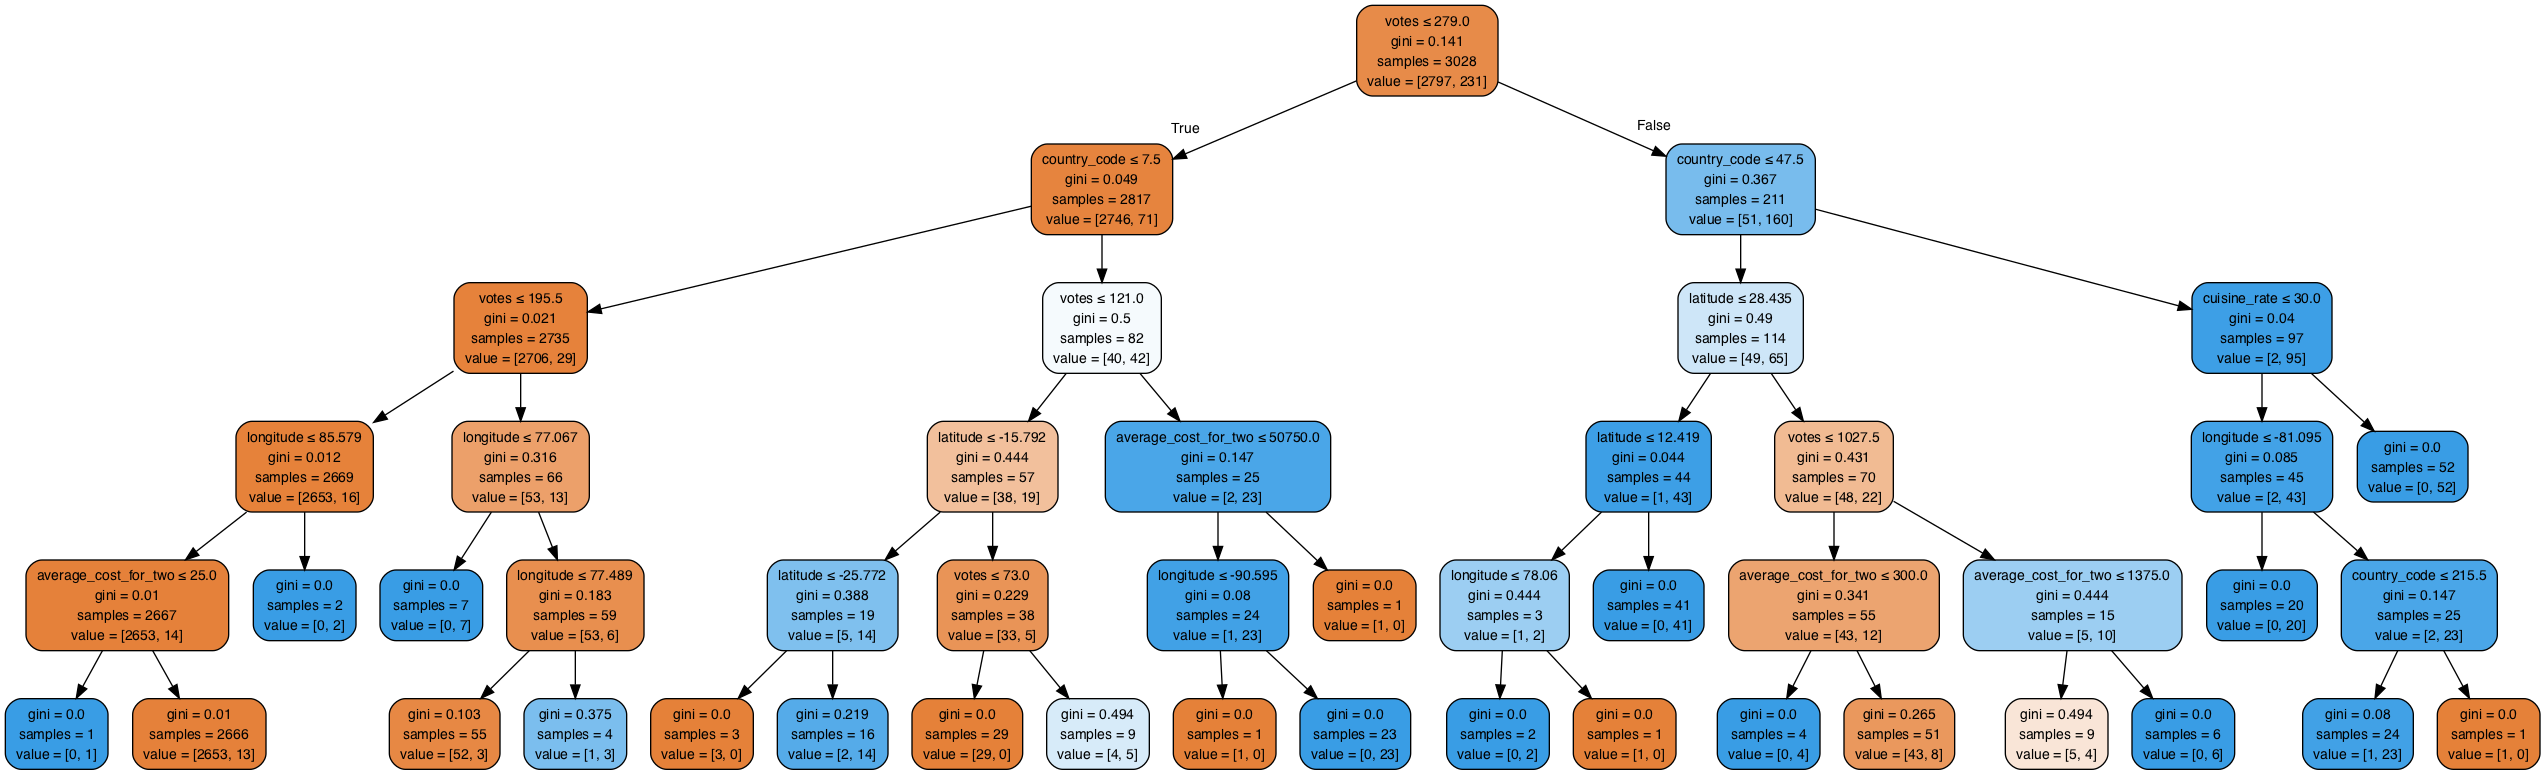

In [36]:
PATH = !pwd
Image(filename = PATH[0] + "/ratingDCTree.png")

## Decision Tree Regression

In [37]:
# Import the model
from sklearn.tree import DecisionTreeRegressor

# Make an instance of the Model
clf = DecisionTreeRegressor(max_depth = 4)

# Train the model on the data 
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
# import the accuracy metrics 
from sklearn.metrics import accuracy_score

# predict the value of restaurant rating 
clf.predict(X_test.iloc[0].values.reshape(1, -1))

array([2.01574803])

In [39]:
from sklearn import tree
dot_data = tree.export_graphviz(clf,
                     out_file = "ratingDRTree.dot",
                     feature_names = features.columns.values,
                     filled=True, rounded=True, special_characters=True)

In [40]:
!dot -Tpng ratingDRTree.dot -o ratingDRTree.png

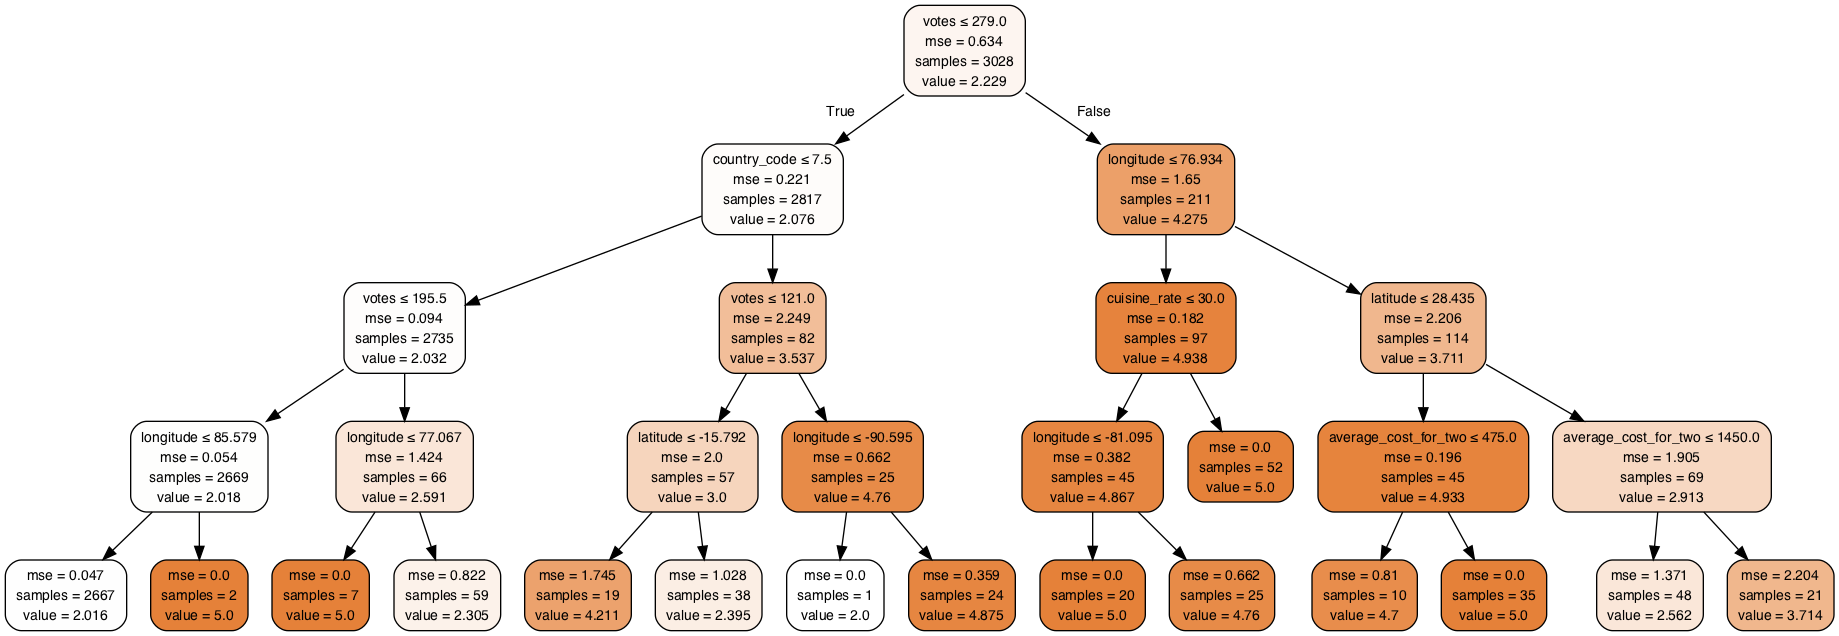

In [41]:
PATH = !pwd
Image(filename = PATH[0] + "/ratingDRTree.png")